In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
btc_week_news = pd.read_csv('bitcoinWeekNewsSearches.csv')
btc_week_news.head()

,date,searches
0,2016-10-02,4
1,2016-10-09,5
2,2016-10-16,5
3,2016-10-23,4
4,2016-10-30,5


In [ ]:
btc_week_searches = pd.read_csv('bitcoinWeekSearches.csv')
btc_week_searches.head()

,date,searches
0,2016-10-02,3
1,2016-10-09,3
2,2016-10-16,3
3,2016-10-23,3
4,2016-10-30,3


In [ ]:
btc_stocks = pd.read_csv('btcStocks.csv')
last_date = btc_stocks.tail(1).date.tolist()[0]
btc_stocks.head()
last_date

'2021-07-12'

In [ ]:
btc_stocks.set_index('date', inplace=True)
btc_week_news.set_index('date', inplace=True)
btc_week_searches.set_index('date', inplace=True)
btc_week_searches.head()

,searches
date,
2016-10-02,3
2016-10-09,3
2016-10-16,3
2016-10-23,3
2016-10-30,3


In [ ]:
btc_week_news.columns = ['newsSearches']
btc_week_searches.columns = ['searches']

stocks_searches = pd.concat([btc_stocks, btc_week_news, btc_week_searches], axis=1)
stocks_searches.reset_index(inplace=True)
stocks_searches.columns = ['date', 'btcClose', 'newsSearches', 'searches']
print(stocks_searches.head())
stocks_searches.dropna().head()

         date    btcClose  newsSearches  searches
0  2014-09-17  457.334015           NaN       NaN
1  2014-09-18  424.440002           NaN       NaN
2  2014-09-19  394.795990           NaN       NaN
3  2014-09-20  408.903992           NaN       NaN
4  2014-09-21  398.821014           NaN       NaN


,date,btcClose,newsSearches,searches
746,2016-10-02,610.892029,4.0,3.0
753,2016-10-09,616.752014,5.0,3.0
760,2016-10-16,641.630981,5.0,3.0
767,2016-10-23,657.070984,4.0,3.0
774,2016-10-30,701.864014,5.0,3.0


In [ ]:
stocks_searches.tail()

,date,btcClose,newsSearches,searches
2497,2021-08-29,NaN,20.0,23.0
2498,2021-09-05,NaN,38.0,30.0
2499,2021-09-12,NaN,15.0,23.0
2500,2021-09-19,NaN,30.0,27.0
2501,2021-09-26,NaN,27.0,23.0


In [ ]:
stocks_searches.fillna(method="ffill", inplace=True)
stocks_searches.dropna(inplace=True)
stocks_searches.head()

,date,btcClose,newsSearches,searches
746,2016-10-02,610.892029,4.0,3.0
747,2016-10-03,612.132996,4.0,3.0
748,2016-10-04,610.203979,4.0,3.0
749,2016-10-05,612.510986,4.0,3.0
750,2016-10-06,613.020996,4.0,3.0


In [ ]:
stocks_searches.drop(stocks_searches[stocks_searches.date > last_date].index, inplace=True)
stocks_searches.tail()

,date,btcClose,newsSearches,searches
2486,2021-07-08,32877.371094,28.0,23.0
2487,2021-07-09,33798.011719,28.0,23.0
2488,2021-07-10,33520.519531,28.0,23.0
2489,2021-07-11,34240.187500,32.0,23.0
2490,2021-07-12,33155.847656,32.0,23.0


In [ ]:
stocks_searches.to_csv('stocksSearches.csv', index=False)

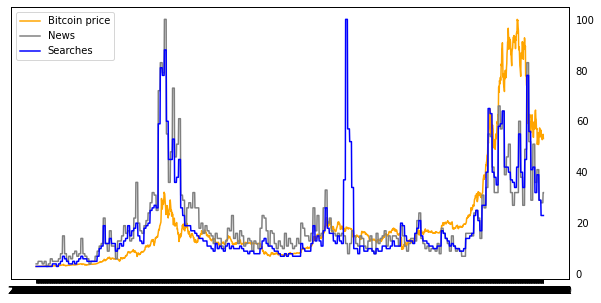

In [ ]:
stocks_searches.set_index('date', inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax2 = ax.twinx()
ax3 = ax2.twinx()

lns1 = ax.plot(stocks_searches.index, stocks_searches.btcClose, label=f"Bitcoin price", color="orange")
lns2 = ax2.plot(stocks_searches.index, stocks_searches.newsSearches, label=f"News", color="grey")
lns3 = ax3.plot(stocks_searches.index, stocks_searches.searches, label=f"Searches", color="blue")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.tick_params(left = False, right = False , labelleft = False)
ax2.tick_params(left = False, right = False , labelleft = False)
ax3.tick_params(left = False, right = False , labelleft = False)

plt.show()

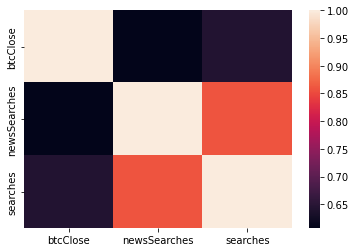

In [ ]:
sns.heatmap(stocks_searches.corr())

In [ ]:
stocks_searches.corr()

,btcClose,newsSearches,searches
btcClose,1.000000,0.607550,0.643226
newsSearches,0.607550,1.000000,0.860147
searches,0.643226,0.860147,1.000000
